# (04) Visualize Receptive Fields

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
rng = get_rng()
poisson = True

## Rev Corr: ```fixate1``` ($\beta$=0.5)

### Load df first

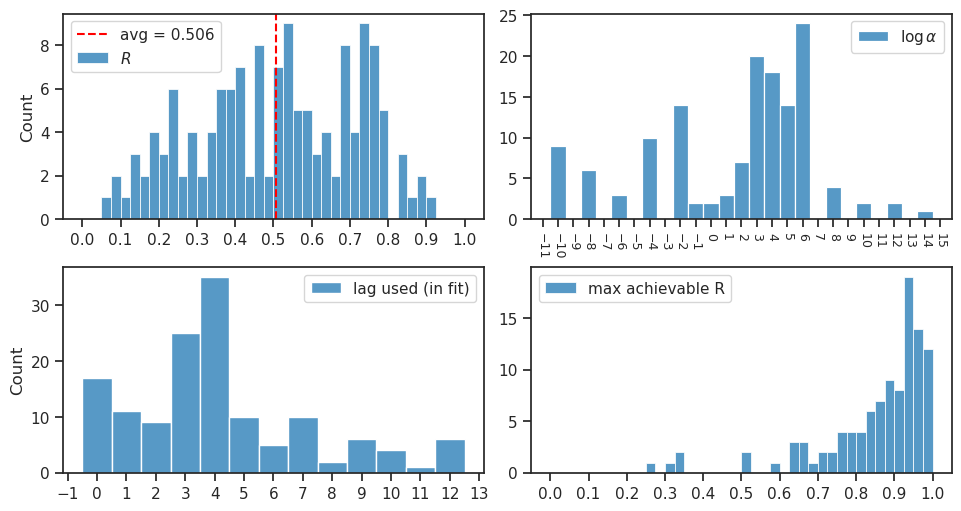

141

In [3]:
fit_name = 'fixate1_nf-420_beta-0.5_(2023_04_30,20:05)'
df, df_all, ro_all, args, tr = summarize_neural_fits(
    fit_name=fit_name, device='cuda:2')

_ = show_neural_results(df)
len(df)

In [4]:
x, z = [], []
for _x, _ in tqdm(iter(tr.dl_trn)):
    _z = tr.model.xtract_ftr(_x)[1]
    _z = torch.cat(_z, dim=1).squeeze()
    x.append(to_np(_x))
    z.append(to_np(_z))
x, z = cat_map([x, z])

100%|██████████| 1000/1000 [04:16<00:00,  3.90it/s]


In [5]:
y_all = {}
kappa = {}
op = 't, tijk -> ijk'
for ro in tqdm(ro_all.values()):
    for idx, m in ro.mod.items():
        key = f"{ro.expt}_{idx}"
        y = m.predict(z)
        if poisson:
            y = np.maximum(y, 0)
            y = rng.poisson(y)
        k = np.einsum(op, y, x)
        k /= sp_lin.norm(k)
        y_all[key] = y
        kappa[key] = k

100%|██████████| 60/60 [02:01<00:00,  2.02s/it]


In [6]:
len(kappa), len(df.perf)

(141, 141)

In [7]:
titles = np.array([
    f"{name}, r = {r}" for name, r in
    zip(list(kappa), np.round(df['perf'].values, 2))
])
kappa_cat = np.stack(list(kappa.values()))
kappa_cat.shape

(141, 2, 17, 17)

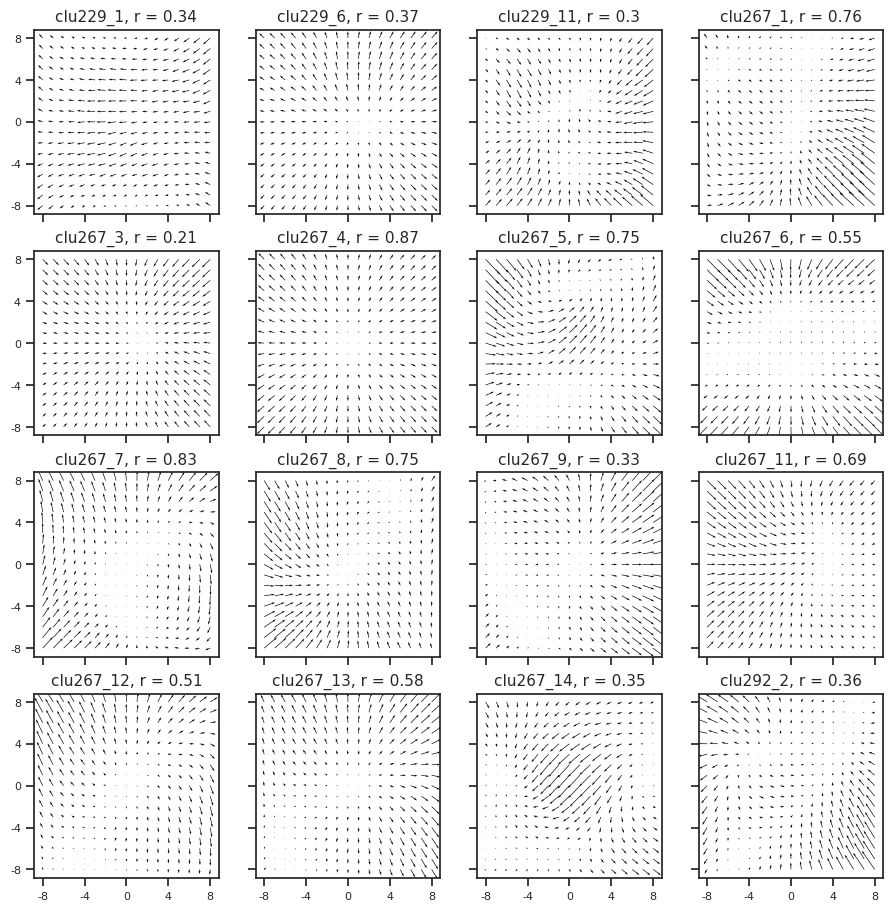

In [8]:
t = 64
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

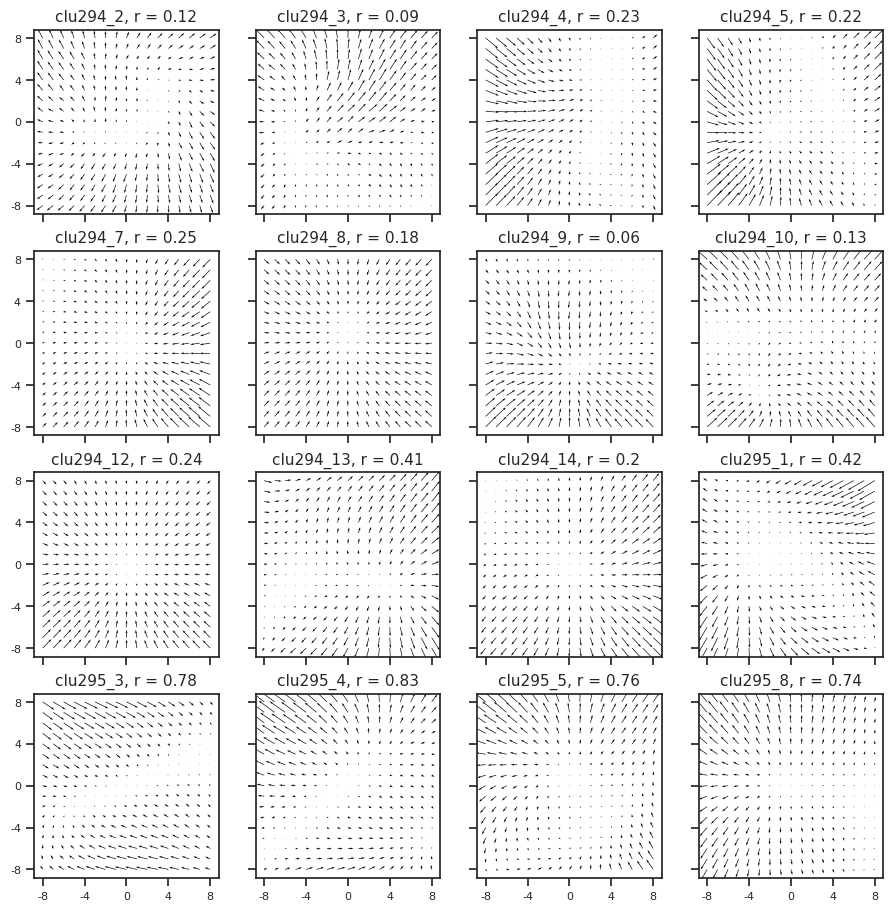

In [9]:
t = 96
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

In [15]:
ro = ro_all['YUWEI_clu267']
data = ro.validate(7)

In [16]:
pred = ro.mod[7].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

16.221475226148506

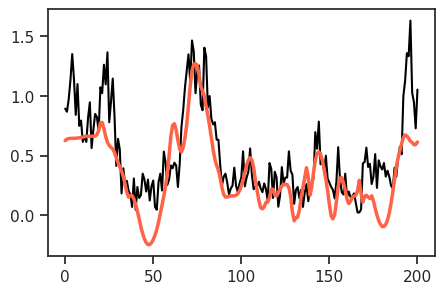

In [17]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [18]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.79101247119222, 43.91424918805949)

In [19]:
r / np.sqrt(ro_all['YUWEI_clu267'].max_perf[7])

0.8279719881345731

In [20]:
ro.df[7]

r  nnll     r_tst     r2_tst
alpha                                      
1.000000e-08 NaN   NaN  0.790897  43.952215
1.000000e-06 NaN   NaN  0.791012  43.914249
1.000000e-04 NaN   NaN  0.783380  34.983313
1.000000e-02 NaN   NaN  0.726160  50.700140
1.000000e-01 NaN   NaN  0.739863  51.232554
1.000000e+00 NaN   NaN  0.738001  50.957398
1.000000e+01 NaN   NaN  0.737900  50.847316
1.000000e+02 NaN   NaN  0.737203  50.542799
1.000000e+03 NaN   NaN  0.731214  48.726989
1.000000e+04 NaN   NaN  0.720769  44.458646
1.000000e+05 NaN   NaN  0.717179  39.636998
1.000000e+06 NaN   NaN  0.682832  30.908015
1.000000e+08 NaN   NaN  0.657684   4.871315
1.000000e+10 NaN   NaN  0.527548  -7.702315
1.000000e+12 NaN   NaN  0.524518  -8.089882
1.000000e+14 NaN   NaN  0.522735  -8.093834
1.000000e+16 NaN   NaN       NaN  -8.093866
0.000000e+00 NaN   NaN  0.722525  47.933910

In [21]:
expt, cell = 'clu267', 4
ro = ro_all[f'YUWEI_{expt}']
data = ro.validate(cell)

In [22]:
pred = ro.mod[cell].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

19.790658905195265

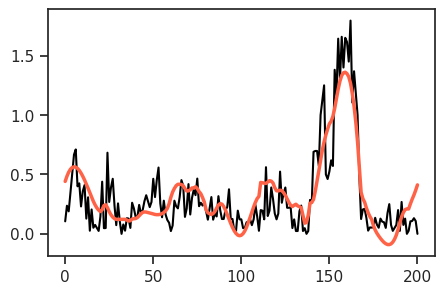

In [23]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [24]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.8566243767335393, 73.236984114033)

In [25]:
r / np.sqrt(ro_all['YUWEI_clu267'].max_perf[cell])

0.8742796199494048

In [26]:
expt, cell = 'clu116', 0
ro = ro_all[f'YUWEI_{expt}']
data = ro.validate(cell)

In [27]:
ro.df[cell]

r  nnll     r_tst       r2_tst
alpha                                        
1.000000e-08 NaN   NaN  0.646501   -90.686201
1.000000e-06 NaN   NaN  0.646514   -90.770134
1.000000e-04 NaN   NaN  0.646936   -90.082496
1.000000e-02 NaN   NaN  0.372534 -1274.902270
1.000000e-01 NaN   NaN  0.649079   -94.041703
1.000000e+00 NaN   NaN  0.651903   -95.145770
1.000000e+01 NaN   NaN  0.652350   -83.021014
1.000000e+02 NaN   NaN  0.653079   -72.636849
1.000000e+03 NaN   NaN  0.656617   -67.053330
1.000000e+04 NaN   NaN  0.661010   -51.012241
1.000000e+05 NaN   NaN  0.652233   -27.969847
1.000000e+06 NaN   NaN  0.621782   -10.521701
1.000000e+08 NaN   NaN  0.494871    -2.996963
1.000000e+10 NaN   NaN  0.461346     0.111604
1.000000e+12 NaN   NaN  0.460960    -0.008476
1.000000e+14 NaN   NaN  0.459771    -0.009747
1.000000e+16 NaN   NaN       NaN    -0.009760
0.000000e+00 NaN   NaN  0.634072   -67.815244

In [29]:
pred = ro.mod[cell].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

0.7008066839527514

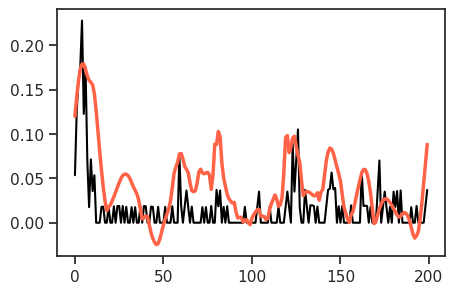

In [30]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [31]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.6610101130135718, -51.01224081453077)

In [32]:
r / np.sqrt(ro_all[f'YUWEI_{expt}'].max_perf[cell])

0.7911712408781327

In [33]:
expt, cell = 'clu090', 0
ro = ro_all[f'YUWEI_{expt}']
data = ro.validate(cell)

In [34]:
ro.df[cell]

r  nnll     r_tst     r2_tst
alpha                                      
1.000000e-08 NaN   NaN  0.822515  67.234564
1.000000e-06 NaN   NaN  0.822529  67.237807
1.000000e-04 NaN   NaN  0.822579  67.257455
1.000000e-02 NaN   NaN  0.812234  65.162529
1.000000e-01 NaN   NaN  0.826907  67.879958
1.000000e+00 NaN   NaN  0.829422  68.295241
1.000000e+01 NaN   NaN  0.831293  68.520456
1.000000e+02 NaN   NaN  0.831729  68.464441
1.000000e+03 NaN   NaN  0.829360  67.914861
1.000000e+04 NaN   NaN  0.813685  65.244330
1.000000e+05 NaN   NaN  0.782572  59.654904
1.000000e+06 NaN   NaN  0.739354  48.542274
1.000000e+08 NaN   NaN  0.582162   5.150471
1.000000e+10 NaN   NaN  0.521518  -6.257972
1.000000e+12 NaN   NaN  0.520179  -6.668195
1.000000e+14 NaN   NaN  0.485392  -6.672405
1.000000e+16 NaN   NaN       NaN  -6.672450
0.000000e+00 NaN   NaN  0.824405  67.498723

In [35]:
pred = ro.mod[cell].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

12.225940499393225

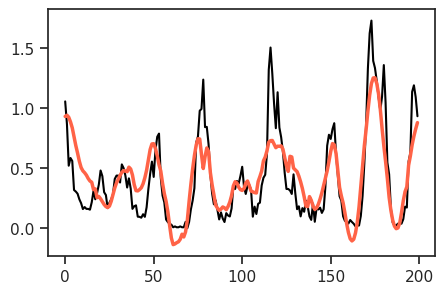

In [36]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [37]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.8317288150221084, 68.46444132856249)

In [38]:
r / np.sqrt(ro_all[f'YUWEI_{expt}'].max_perf[cell])

0.8401135332641169

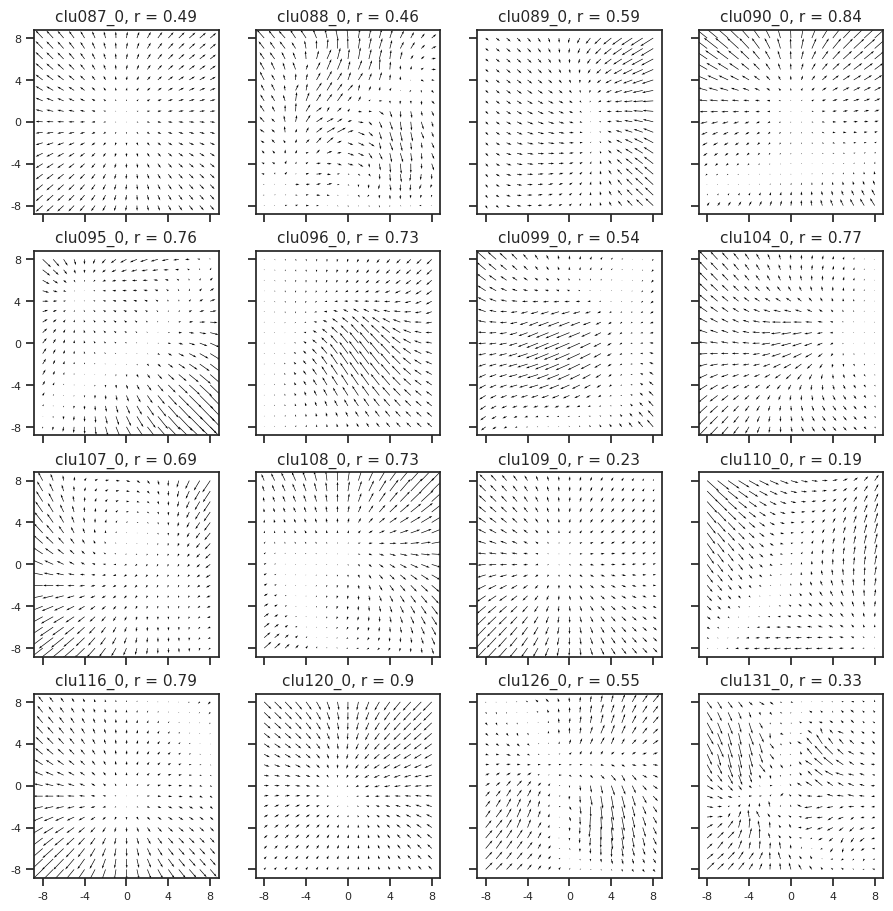

In [41]:
t = 16
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

In [59]:
expt, cell = 'clu104', 0
ro = ro_all[f'YUWEI_{expt}']
data = ro.validate(cell)

In [60]:
ro.df[cell]

r  nnll     r_tst     r2_tst
alpha                                      
1.000000e-08 NaN   NaN  0.751166  52.935630
1.000000e-06 NaN   NaN  0.751101  52.938490
1.000000e-04 NaN   NaN  0.751609  53.035456
1.000000e-02 NaN   NaN  0.751611  52.699842
1.000000e-01 NaN   NaN  0.734063  49.362642
1.000000e+00 NaN   NaN  0.728083  47.965795
1.000000e+01 NaN   NaN  0.728796  48.213968
1.000000e+02 NaN   NaN  0.732654  48.916532
1.000000e+03 NaN   NaN  0.734866  48.706035
1.000000e+04 NaN   NaN  0.739013  47.559537
1.000000e+05 NaN   NaN  0.740627  43.456966
1.000000e+06 NaN   NaN  0.757276  35.261200
1.000000e+08 NaN   NaN  0.418864   5.797105
1.000000e+10 NaN   NaN  0.305093 -14.952776
1.000000e+12 NaN   NaN  0.303698 -15.724287
1.000000e+14 NaN   NaN  0.289757 -15.732160
1.000000e+16 NaN   NaN       NaN -15.732254
0.000000e+00 NaN   NaN  0.717095  46.913225

In [61]:
pred = ro.mod[cell].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

28.222366204483606

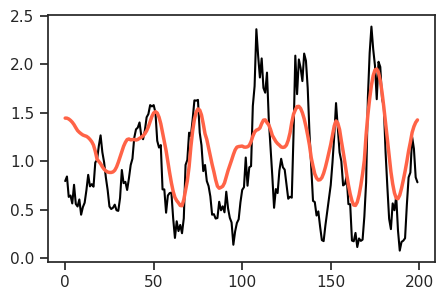

In [62]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [63]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.7572761967713222, 35.261200280620145)

In [64]:
r / np.sqrt(ro_all[f'YUWEI_{expt}'].max_perf[cell])

0.7720762079080233

In [58]:
for key, ro in ro_all.items():
    if not ro.has_repeats:
        continue
    print(key, {k: max(0, v['r2_tst'].max()) for k, v in ro.df.items()})

YUWEI_clu088
{0: 4.357224697603746}

YUWEI_clu089
{0: 22.31959084770271}

YUWEI_clu090
{0: 68.52045566107395}

YUWEI_clu095
{0: 49.85705113351323}

YUWEI_clu096
{0: 0}

YUWEI_clu099
{0: 0.0971754414466619}

YUWEI_clu104
{0: 53.0354561544834}

YUWEI_clu107
{0: 41.29721863198949}

YUWEI_clu108
{0: 0.05723395554227961}

YUWEI_clu116
{0: 0.11160389898560164}

YUWEI_clu120
{0: 49.85034793783829}

YUWEI_clu126
{0: 8.232571150542222}

YUWEI_clu131
{0: 0}

YUWEI_clu132
{0: 15.938484011894394}

YUWEI_clu142
{0: 45.66813189546555}

YUWEI_clu145
{0: 0}

YUWEI_clu181
{0: 6.965895265623789}

YUWEI_clu183
{0: 15.299477113465432}

YUWEI_clu209
{
    0: 36.27901436086932,
    1: 55.29045384684652,
    4: 40.32571450146525,
    12: 36.88652229519905,
    13: 40.798150005208896,
    14: 30.913639069447818,
    15: 22.94494548006252
}

YUWEI_clu216
{0: 8.126382770527652}

YUWEI_clu221
{
    1: 36.80204863451962,
    2: 29.514039311452212,
    3: 47.56653776836755,
    6: 30.145471829696714,
    7: 15.894252408255394
}

YUWEI_clu222
{0: 47.21862605027284}

YUWEI_clu223
{
    8: 10.98750792902261,
    9: 20.543146346616624,
    10: 18.790688039513846,
    11: 23.820274125855832,
    12: 0
}

YUWEI_clu224
{0: 0}

YUWEI_clu225
{0: 0}

YUWEI_clu226
{0: 22.129239772013733}

YUWEI_clu227
{0: 0.7612764997932508}

YUWEI_clu229
{1: 4.921010738837794, 6: 6.437133402041284, 11: 0}

YUWEI_clu267
{
    1: 48.24975323967213,
    3: 3.4354036815018585,
    4: 73.236984114033,
    5: 48.75067787482807,
    6: 13.801196233930757,
    7: 51.23255431615385,
    8: 52.53960790466512,
    9: 9.451459418045394,
    11: 0.09405027786913989,
    12: 12.64542009114239,
    13: 20.597269470798196,
    14: 0
}

YUWEI_clu292
{
    2: 0,
    4: 46.93464093470645,
    6: 0,
    7: 7.605829660107554,
    12: 0,
    13: 11.888108521096841,
    15: 6.219918176516703
}

YUWEI_clu293
{
    1: 0,
    3: 0,
    4: 0,
    5: 8.966431245937912,
    6: 12.149647780022466,
    7: 0,
    8: 0,
    9: 25.7753458360101,
    10: 0
}

YUWEI_clu295
{
    1: 0.22294367464243958,
    3: 52.099097198016,
    4: 51.0741466848788,
    5: 41.54272650379258,
    8: 52.33800111537169,
    10: 0,
    11: 0,
    15: 9.835629718251472
}

YUWEI_ytu023
{0: 0}

YUWEI_ytu028
{4: 42.27489517561989, 8: 0, 18: 32.18579204106674}

YUWEI_ytu029
{
    0: 0,
    1: 13.739024350624662,
    2: 0,
    3: 0,
    4: 47.915174433196405,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 20.011279381266622,
    12: 0,
    13: 0,
    15: 17.28176532853327,
    16: 13.413950005136755,
    17: 21.92137549453188,
    18: 0,
    19: 15.345836970445658,
    20: 5.695601192440036,
    21: 17.3800317075815,
    22: 0,
    23: 25.299140339728655
}

## Rev Corr: ```obj1``` ($\beta$=0.15)

### Load df first

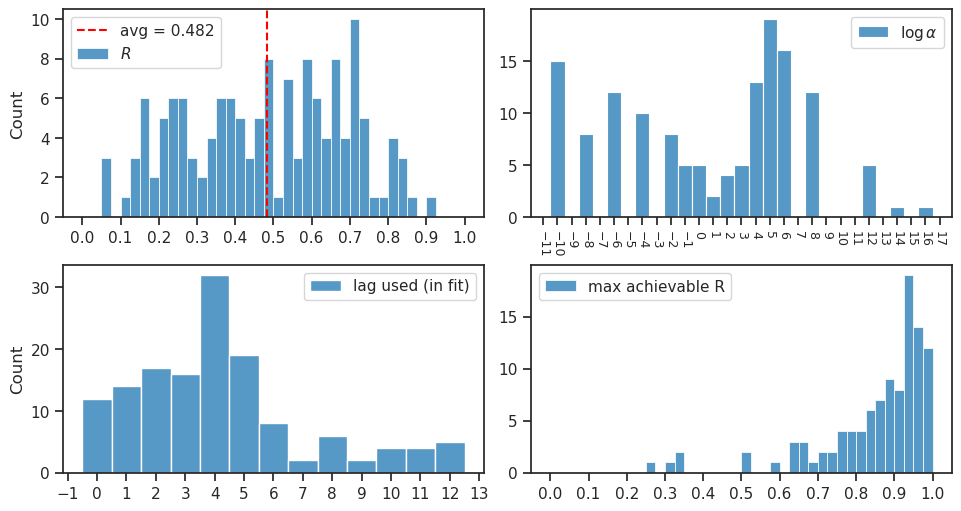

141

In [26]:
fit_name = 'obj1_nf-280_(2023_04_26,15:53)'
df, df_all, ro_all, args, tr = summarize_neural_fits(
    fit_name=fit_name, device='cuda:2')

_ = show_neural_results(df)
len(df)

In [27]:
x, z = [], []
for _x, _ in tqdm(iter(tr.dl_trn)):
    _z = tr.model.xtract_ftr(_x)[1]
    _z = torch.cat(_z, dim=1).squeeze()
    x.append(to_np(_x))
    z.append(to_np(_z))
x, z = cat_map([x, z])

100%|██████████| 1000/1000 [03:18<00:00,  5.03it/s]


In [28]:
y_all = {}
kappa = {}
op = 't, tijk -> ijk'
for ro in tqdm(ro_all.values()):
    for idx, m in ro.mod.items():
        key = f"{ro.expt}_{idx}"
        y = m.predict(z)
        if poisson:
            y = np.maximum(y, 0)
            y = rng.poisson(y)
        k = np.einsum(op, y, x)
        k /= sp_lin.norm(k)
        y_all[key] = y
        kappa[key] = k

100%|██████████| 60/60 [01:42<00:00,  1.71s/it]


In [29]:
len(kappa), len(df.perf)

(141, 141)

In [30]:
titles = np.array([
    f"{name}, r = {r}" for name, r in
    zip(list(kappa), np.round(df['perf'].values, 2))
])
kappa_cat = np.stack(list(kappa.values()))
kappa_cat.shape

(141, 2, 17, 17)

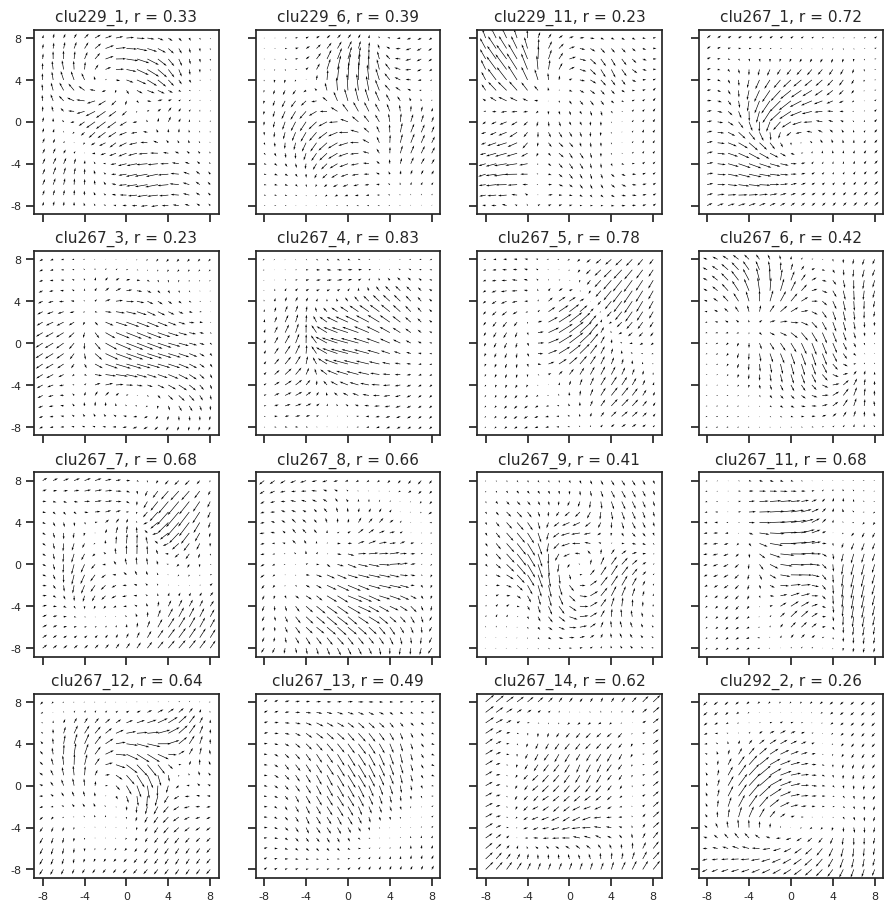

In [31]:
t = 64
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

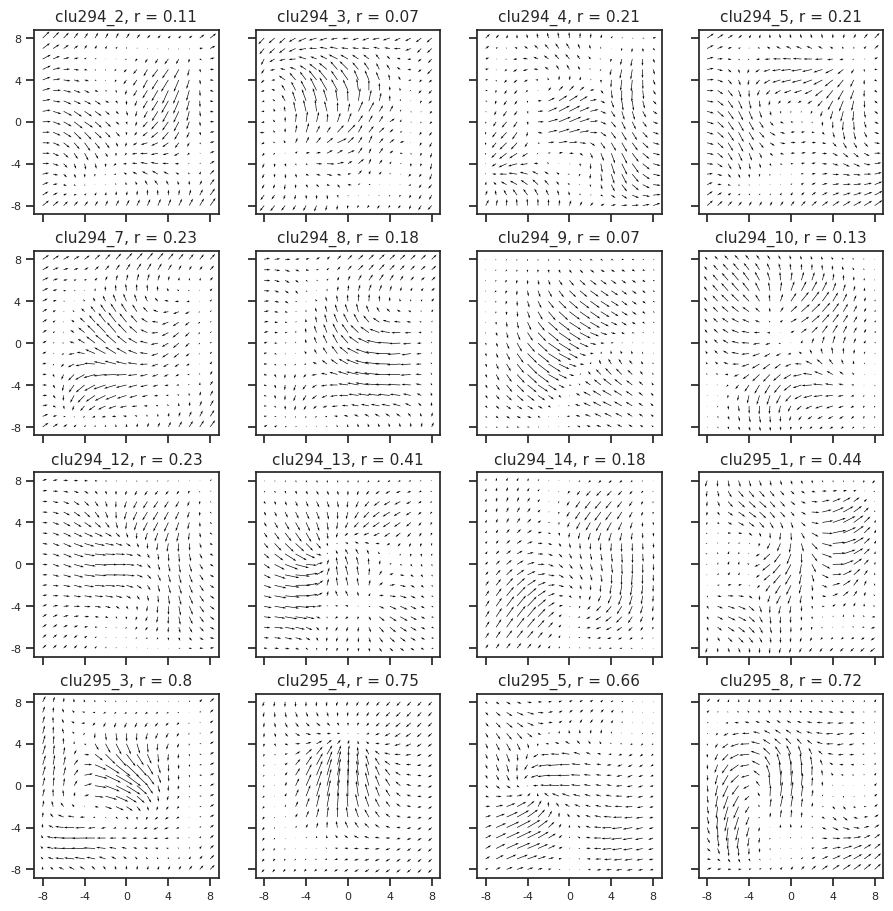

In [32]:
t = 96
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

In [33]:
ro = ro_all['YUWEI_clu267']
data = ro.validate(7)

In [34]:
pred = ro.mod[7].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

16.221475226148506

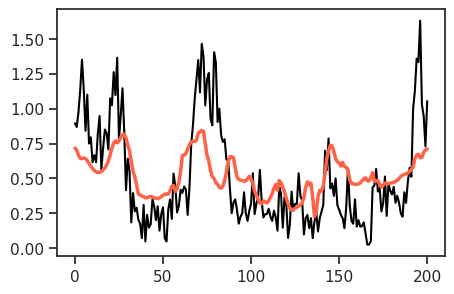

In [35]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [36]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.6504681765444953, 35.13364449249874)

In [37]:
r / np.sqrt(ro_all['YUWEI_clu267'].max_perf[7])

0.6808608574022611

In [38]:
expt, cell = 'clu267', 4
ro = ro_all[f'YUWEI_{expt}']
data = ro.validate(cell)

In [39]:
pred = ro.mod[cell].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

19.790658905195265

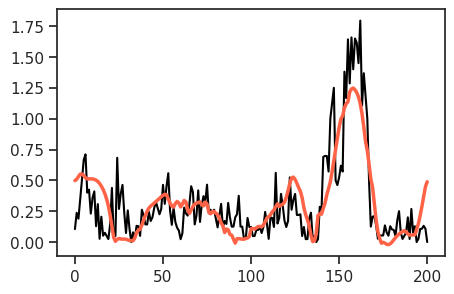

In [40]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [41]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.8083513439601778, 65.3427289633181)

In [42]:
r / np.sqrt(ro_all['YUWEI_clu267'].max_perf[cell])

0.8250116678653987

In [56]:
expt, cell = 'clu116', 0
ro = ro_all[f'YUWEI_{expt}']
data = ro.validate(cell)

In [50]:
pred = ro.mod[cell].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

0.7008066839527514

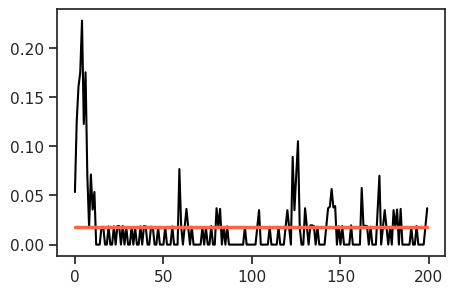

In [51]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [52]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.7718747728102627, -0.009758723397235158)

In [47]:
r / np.sqrt(ro_all[f'YUWEI_{expt}'].max_perf[cell])

2.240083423413304

## Rev Corr: ```fixate8``` ($\beta$=0.15)

### Load df first

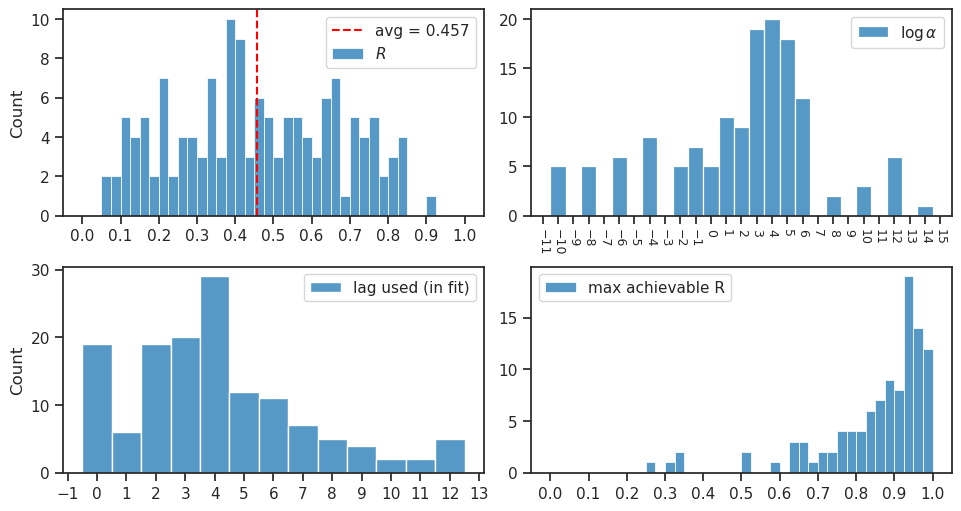

141

In [16]:
fit_name = 'fixate8_nf-420_(2023_04_28,14:34)'
df, df_all, ro_all, args, tr = summarize_neural_fits(
    fit_name=fit_name, device='cuda:2')

_ = show_neural_results(df)
len(df)

In [17]:
x, z = [], []
for _x, _ in tqdm(iter(tr.dl_trn)):
    _z = tr.model.xtract_ftr(_x)[1]
    _z = torch.cat(_z, dim=1).squeeze()
    x.append(to_np(_x))
    z.append(to_np(_z))
x, z = cat_map([x, z])

100%|██████████| 1000/1000 [04:13<00:00,  3.95it/s]


In [18]:
y_all = {}
kappa = {}
op = 't, tijk -> ijk'
for f in tqdm(sorted(os.listdir(results_dir(fit_name)))):
    if not f.endswith('.pkl'):
        continue
    root = f.split('.')[0]
    root, expt = root.split('-')
    kws = dict(tr=tr, root=root, expt=expt)
    ro = Neuron(**kws).load(fit_name, 'cpu')
    for idx, m in ro.mod.items():
        y = m.predict(z)
        k = np.einsum(op, y, x)
        k /= sp_lin.norm(k)
        key = f"{expt}_{idx}"
        y_all[key] = y
        kappa[key] = k

100%|██████████| 65/65 [00:58<00:00,  1.10it/s]


In [19]:
len(kappa), len(df.perf)

(141, 141)

In [20]:
titles = np.array([
    f"{name}, r = {r}" for name, r in
    zip(list(kappa), np.round(df['perf'].values, 2))
])
kappa_cat = np.stack(list(kappa.values()))
kappa_cat.shape

(141, 2, 17, 17)

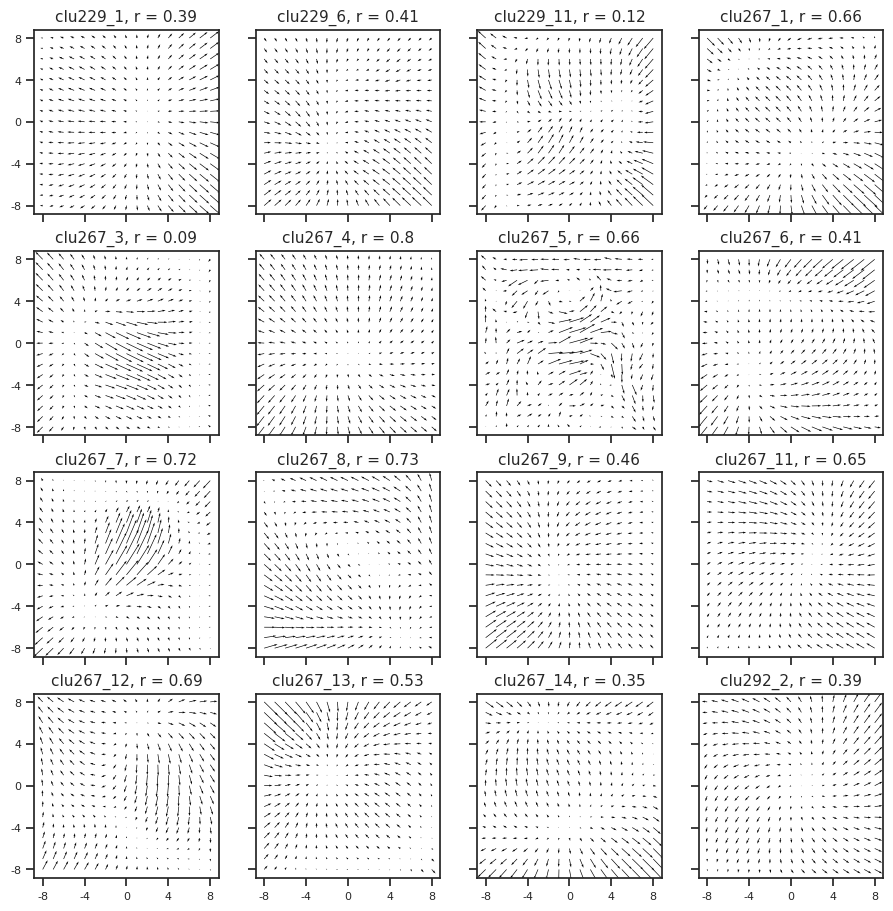

In [21]:
t = 64
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

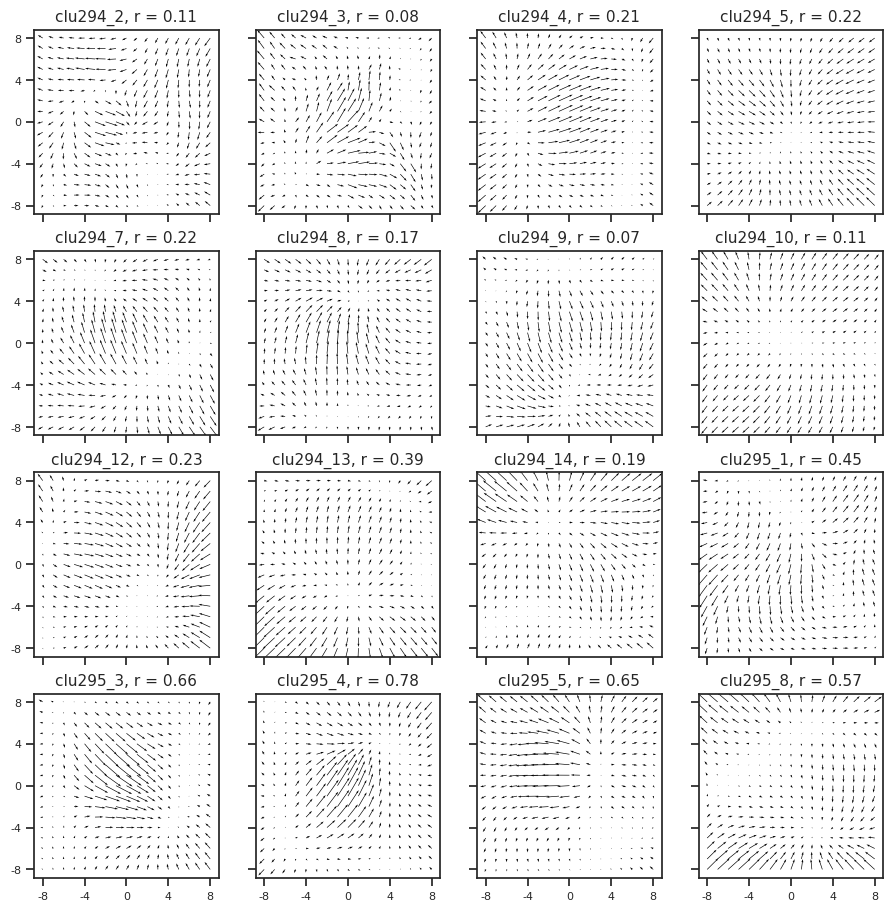

In [22]:
t = 96
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

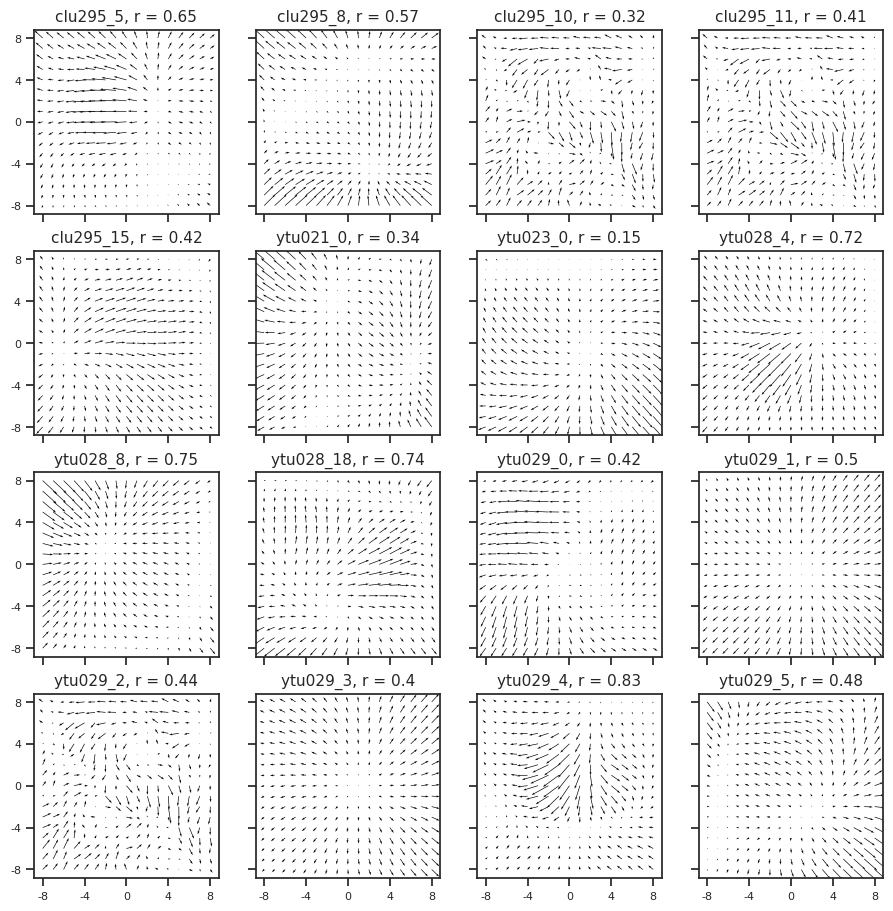

In [33]:
t = 110
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

In [32]:
df.loc[df['expt'] == 'ytu028']

category   nf  beta   root    expt  cell      perf  max_perf  log_alpha  \
117  fixate8  420  0.15  YUWEI  ytu028     4  0.716754  0.983154        5.0   
118  fixate8  420  0.15  YUWEI  ytu028     8  0.752729  0.328052        0.0   
119  fixate8  420  0.15  YUWEI  ytu028    18  0.744019  0.759893        5.0   

     best_lag  
117         4  
118         3  
119         2

## Rev Corr: ```transl4``` ($\beta$=0.15)

### Load df first

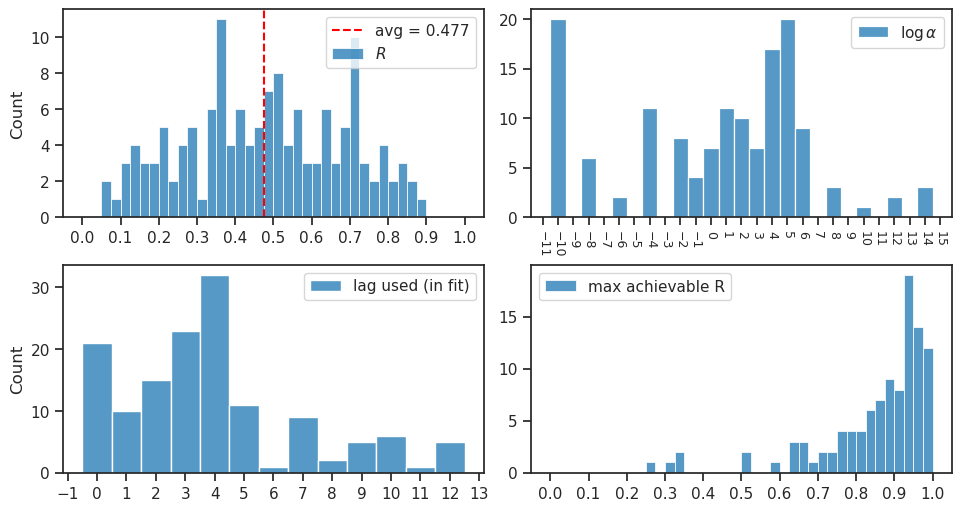

141

In [34]:
fit_name = 'transl4_nf-420_(2023_04_27,07:52)'
df, df_all, ro_all, args, tr = summarize_neural_fits(
    fit_name=fit_name, device='cuda:2')

_ = show_neural_results(df)
len(df)

In [35]:
x, z = [], []
for _x, _ in tqdm(iter(tr.dl_trn)):
    _z = tr.model.xtract_ftr(_x)[1]
    _z = torch.cat(_z, dim=1).squeeze()
    x.append(to_np(_x))
    z.append(to_np(_z))
x, z = cat_map([x, z])

100%|██████████| 1000/1000 [04:14<00:00,  3.93it/s]


In [36]:
y_all = {}
kappa = {}
op = 't, tijk -> ijk'
for f in tqdm(sorted(os.listdir(results_dir(fit_name)))):
    if not f.endswith('.pkl'):
        continue
    root = f.split('.')[0]
    root, expt = root.split('-')
    kws = dict(tr=tr, root=root, expt=expt)
    ro = Neuron(**kws).load(fit_name, 'cpu')
    for idx, m in ro.mod.items():
        y = m.predict(z)
        k = np.einsum(op, y, x)
        k /= sp_lin.norm(k)
        key = f"{expt}_{idx}"
        y_all[key] = y
        kappa[key] = k

100%|██████████| 65/65 [00:57<00:00,  1.13it/s]


In [37]:
len(kappa), len(df.perf)

(141, 141)

In [38]:
titles = np.array([
    f"{name}, r = {r}" for name, r in
    zip(list(kappa), np.round(df['perf'].values, 2))
])
kappa_cat = np.stack(list(kappa.values()))
kappa_cat.shape

(141, 2, 17, 17)

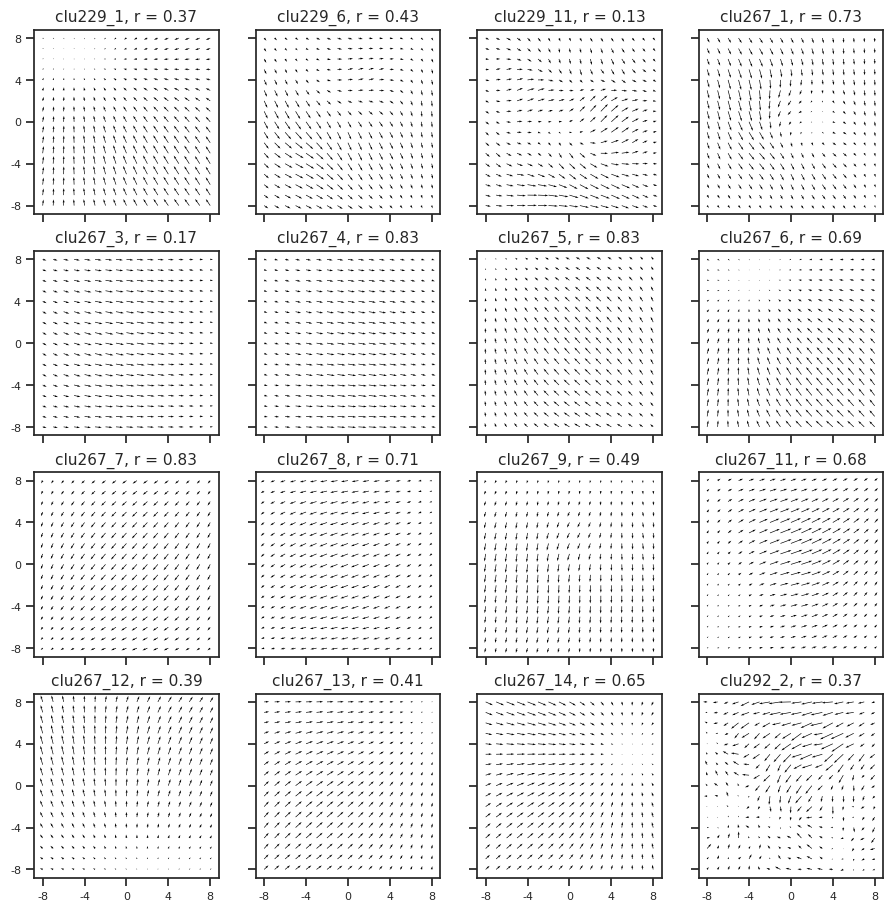

In [39]:
t = 64
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

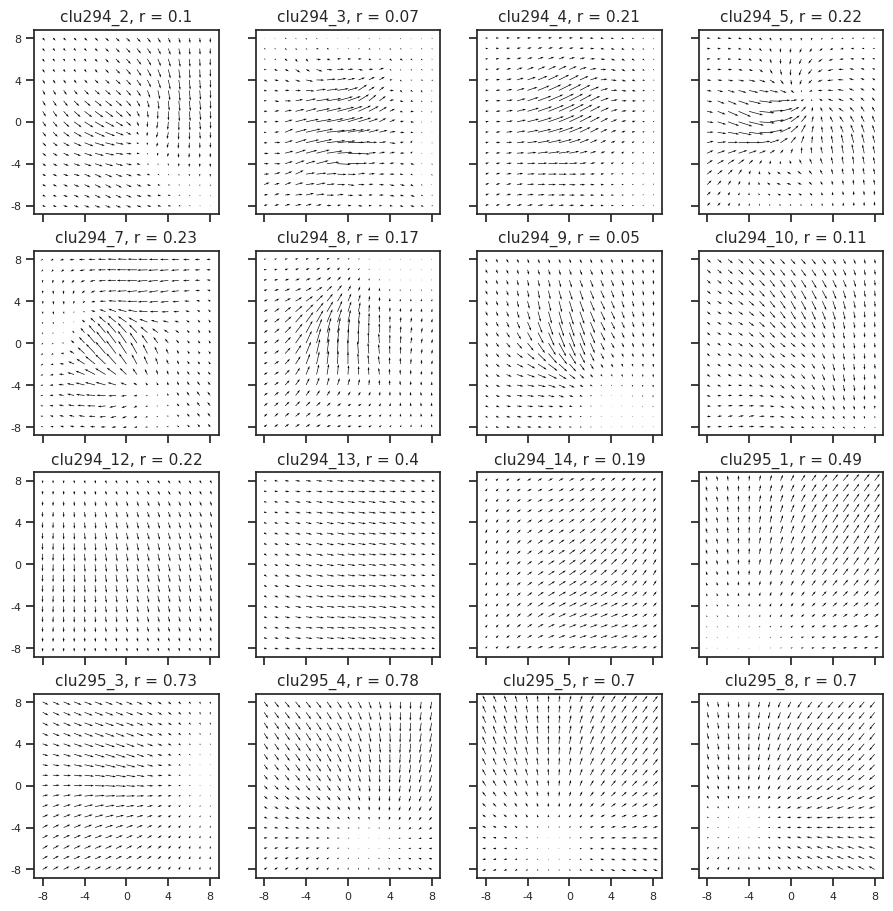

In [40]:
t = 96
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

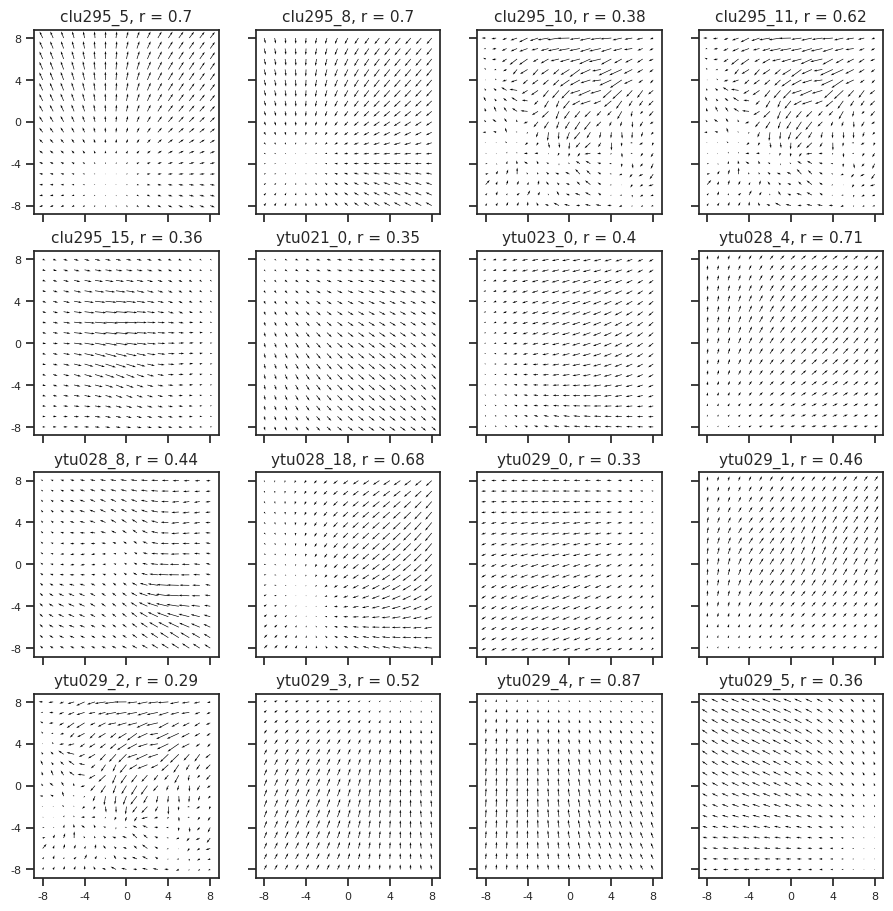

In [41]:
t = 110
intvl = range(t, t + 16)
show_opticflow(kappa_cat[intvl], titles=titles[intvl]);

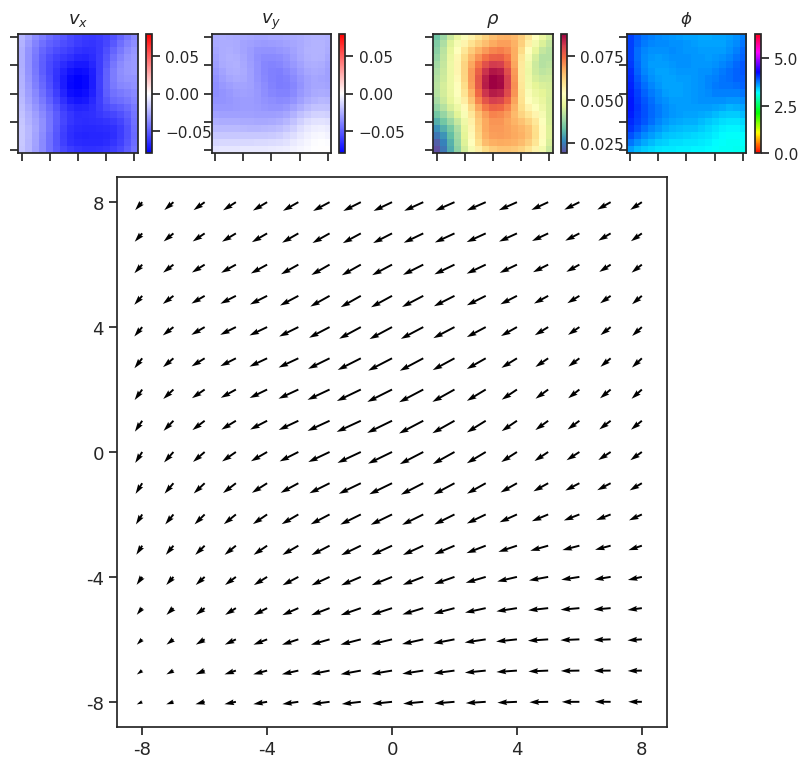

In [44]:
show_opticflow_full(k);

In [45]:
rng = get_rng()
k = np.einsum(op, rng.poisson(np.maximum(y, 0)), x)
k /= sp_lin.norm(k)

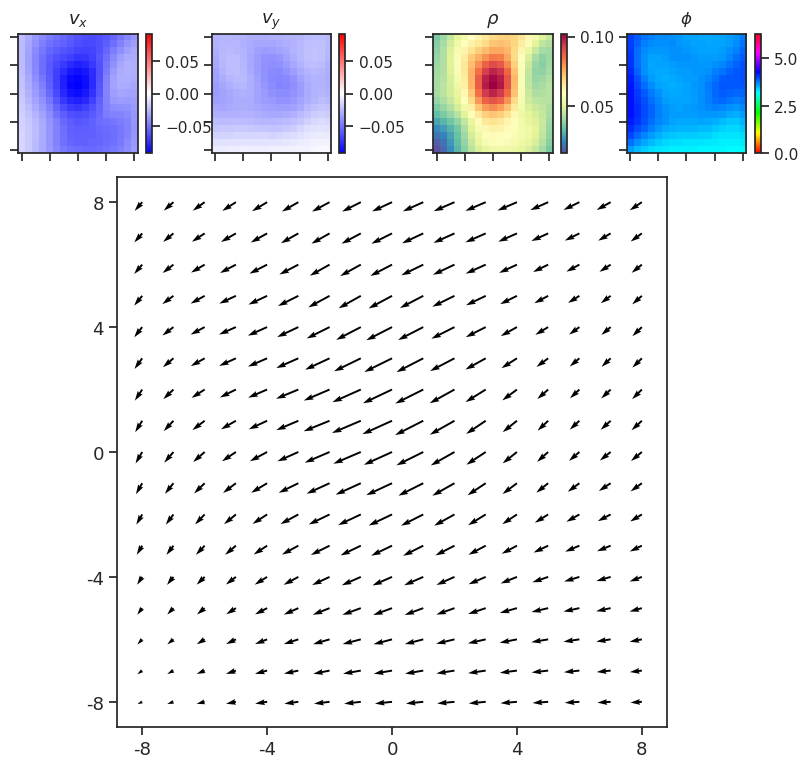

In [46]:
show_opticflow_full(k);

## Done

In [2]:
fit_name = 'transl1_nf-420_(2023_04_27,13:00)' # 'fixate1_nf-420_beta-0.5_(2023_04_30,20:05)'
expt, cell = 'clu267', 7
kws = dict(tr=None, root='YUWEI', expt=expt)
ro = Neuron(**kws).load(fit_name, 'cuda:2')

In [3]:
data = ro.validate(7)
pred = ro.mod[7].predict(data['x_tst'])
data['y'].sum() / (len(data['y']) * 25e-3)

16.221475226148506

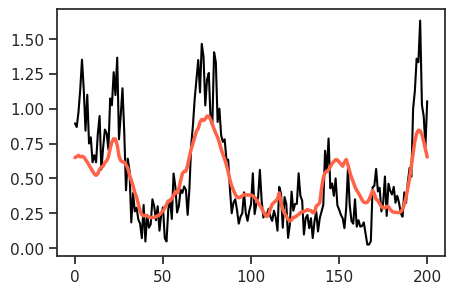

In [4]:
plt.plot(data['y_tst'], color='k', lw=1.5)
plt.plot(pred, color='tomato', lw=2.5)

In [5]:
r = sp_stats.pearsonr(data['y_tst'], pred)[0]
r2 = sk_metric.r2_score(data['y_tst'], pred) * 100
r, r2

(0.8372280722387222, 60.948868326654946)

In [3]:
ro.tr.device

device(type='cuda', index=2)

In [4]:
x, z = [], []
for _x, _ in tqdm(iter(ro.tr.dl_tst)):
    _z = ro.tr.model.xtract_ftr(_x)[1]
    _z = torch.cat(_z, dim=1).squeeze()
    x.append(to_np(_x))
    z.append(to_np(_z))
x, z = cat_map([x, z])
x.shape, z.shape

100%|██████████| 125/125 [00:35<00:00,  3.53it/s]


((75000, 2, 17, 17), (75000, 420))

In [5]:
y = ro.mod[7].predict(z)
x.shape, z.shape, y.shape

((75000, 2, 17, 17), (75000, 420), (75000,))

In [6]:
y.shape

(75000,)

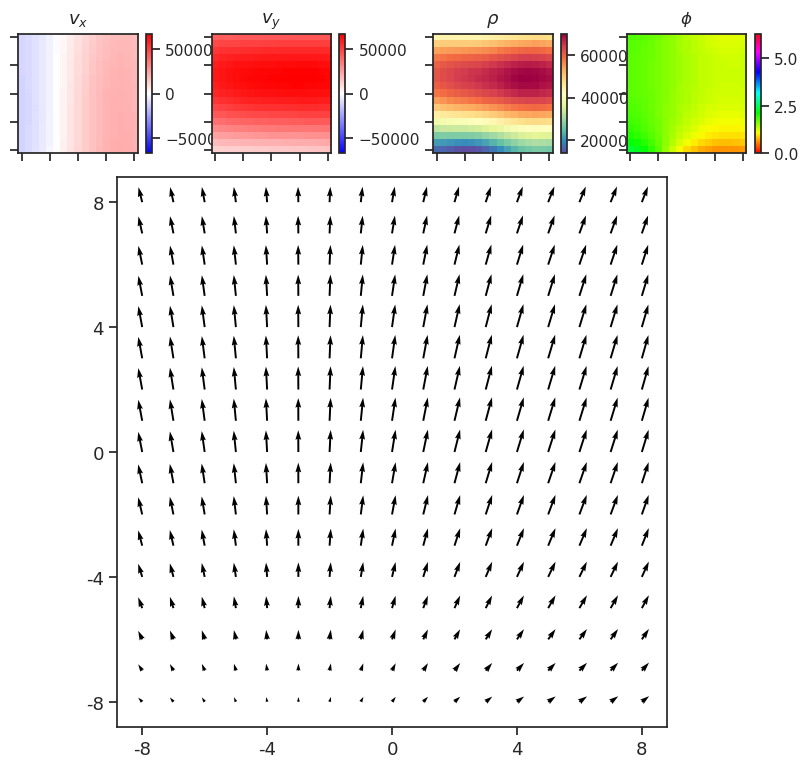

In [12]:
kappa = np.einsum('t, tijk -> ijk', y, x)
show_opticflow_full(kappa);

In [17]:
rng = get_rng()
y = rng.poisson(np.maximum(y, 0))

In [18]:
y.sum()

187886

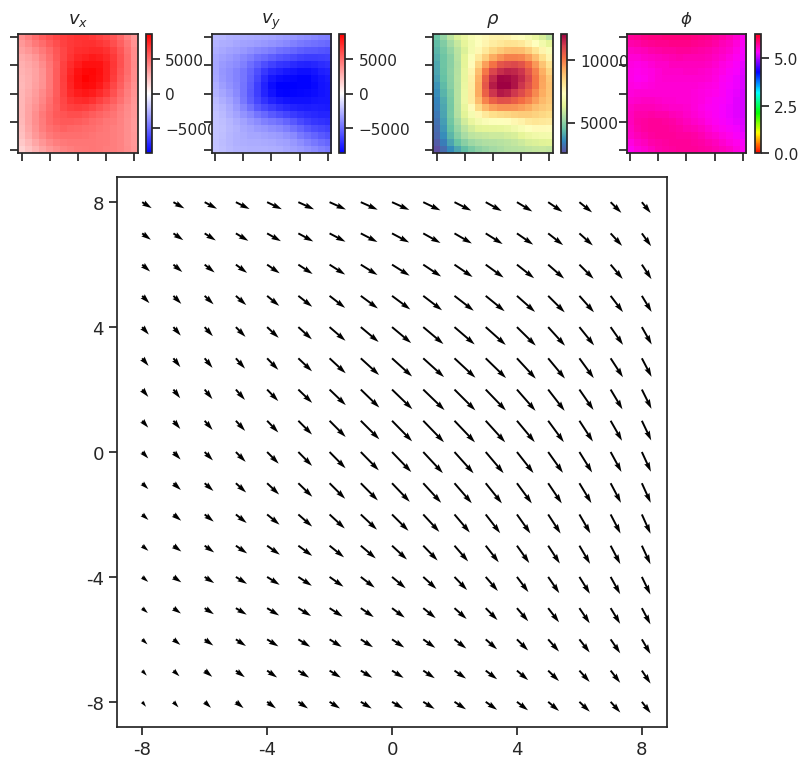

In [19]:
kappa = np.einsum('t, tijk -> ijk', y, x)
show_opticflow_full(kappa);

## Copy fits to tmp dir

In [2]:
fits = [
    'fixate0_nf-80_(2023_04_28,22:46)',
    'fixate1_nf-420_(2023_04_27,20:20)',
    # 'fixate2_nf-420_(2023_04_27,13:57)',
    # 'fixate2_nf-420_(2023_04_28,12:46)', # local to GABAN, currently not used
    # 'fixate4_nf-420_(2023_04_28,16:15)',
    # 'fixate8_nf-420_(2023_04_28,14:34)',

    'transl0_nf-70_(2023_04_27,13:30)',
    'transl1_nf-420_(2023_04_27,13:00)',
    # 'transl2_nf-420_(2023_04_27,19:16)',
    # 'transl4_nf-420_(2023_04_27,07:52)',
    # 'transl8_nf-420_(2023_04_30,07:48)',

    'obj1_nf-280_(2023_04_26,15:53)',
    # 'obj2_nf-280_(2023_05_01,07:39)',
    # 'obj4_nf-280_(2023_04_26,18:21)',
    # 'obj8_nf-420_(2023_04_28,12:48)',

    # 'terrain1_nf-210_(2023_04_27,12:50)',
    # 'terrain2_nf-420_(2023_04_28,15:15)',
    # 'terrain4_nf-420_(2023_04_28,14:08)',
    # 'terrain8_nf-420_(2023_04_26,22:51)',
]
copy_fits(fits, pjoin(tmp_dir, 'results_combined'))

## Load & analyze

In [3]:
df = []
perf = {}
for fit_name in fits:
    _df = f"summary_{fit_name}.df"
    _df = pjoin(tmp_dir, 'results_combined', _df)
    _df = pd.read_pickle(_df)
    k = _df['category'].unique().item()
    perf[k] = _df.perf.values
    df.append(_df)
df = pd.concat(df)
print({k: len(v) for k, v in perf.items()})

{'fixate0': 141, 'fixate1': 141, 'transl0': 141, 'transl1': 141, 'obj1': 141}

In [4]:
grouped_by_cat = collections.defaultdict(list)
grouped_by_nobj = collections.defaultdict(list)
for sim in df['category'].unique():
    cat, n = sim[:-1], int(sim[-1])
    grouped_by_cat[cat].append(n)
    grouped_by_nobj[n].append(cat)
grouped_by_cat = dict(grouped_by_cat)
grouped_by_nobj = dict(grouped_by_nobj)

print(grouped_by_cat)
print(grouped_by_nobj)

{'fixate': [0, 1], 'transl': [0, 1], 'obj': [1]}

{0: ['fixate', 'transl'], 1: ['fixate', 'transl', 'obj']}

In [5]:
pal = {}
colors = ['Blues', 'Oranges', 'Greens', 'Purples', 'Greys']
for c, (k, v) in zip(colors, grouped_by_cat.items()):
    _pal = sns.color_palette(c, n_colors=len(v) + 3)[1:-2]
    for i in range(len(v)):
        pal[f"{k}{v[i]}"] = _pal[i]

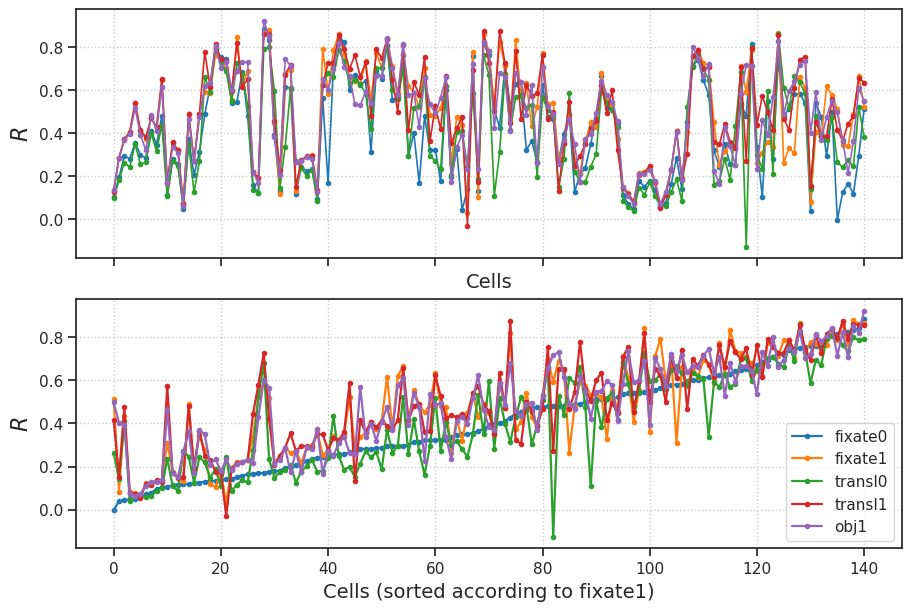

In [6]:
# HIDE CODE


sorted_data = sorted(
    zip(*(v for v in perf.values())),
    key=lambda x: x[0],
)
sorted_data = tuple(zip(*sorted_data))


fig, axes = create_figure(2, 1, (9, 6), 'all', layout='constrained')

for k, v in perf.items():
    axes[0].plot(v, marker='.', lw=1.2, label=k)
axes[0].set_xlabel('Cells', fontsize=14)

for k, v in zip(perf, sorted_data):
    axes[1].plot(v, marker='.', lw=1.6, label=k)
axes[1].set_xlabel('Cells (sorted according to fixate1)', fontsize=14)
axes[1].legend()

for ax in axes.flat:
    ax.set_ylabel(r'$R$', fontsize=16)
    ax.grid()

plt.show()

In [7]:
# HIDE CODE


x = np.stack([v for v in perf.values()])

counts = collections.Counter(np.argmax(x, axis=0))
counts = {
    list(perf)[i]: c for i, c
    in counts.most_common()
}
counts = {
    k: counts.get(k, 0) for k
    in list(counts) + list(perf)
}

percent = {
    k: np.round(100 * v / sum(counts.values()), 1)
    for k, v in counts.items()
}
print(percent)

{'transl1': 34.0, 'fixate1': 30.5, 'obj1': 24.1, 'transl0': 6.4, 'fixate0': 5.0}

In [8]:
best = x.max(0)
x = best.mean()
x

0.5351586222201331

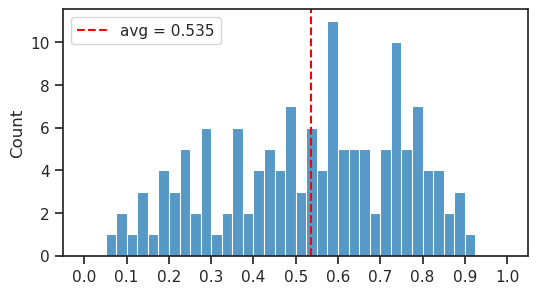

In [9]:
fig, ax = create_figure(1, 1, (6, 3.2))
sns.histplot(best, bins=np.linspace(0, 1, 41), ax=ax)
ax.axvline(x, color='r', ls='--', label=f"avg = {x:0.3f}")
ax.locator_params(axis='x', nbins=11)
ax.legend()
plt.show()

In [10]:
patrick = 100 * (best.mean() - .251) / .251
res = 100 * (best.mean() - .447) / .447

msg = f"outperforming patrick: {patrick:0.0f} %"
msg += f"\noutperforming reservoir: {res:0.0f} %"
print(msg)

outperforming patrick: 113 %
outperforming reservoir: 20 %

## More plots

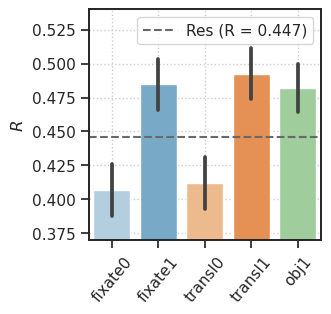

In [11]:
# HIDE CODE


fig, ax = create_figure(1, 1, (3, 3))
sns.barplot(
    data=df,
    x='category',
    y='perf',
    hue='category',
    palette=pal,
    errorbar='se',
    dodge=False,
    ax=ax,
)
ax.get_legend().remove()
ax.set(xlabel='', ylabel=r'$R$', ylim=(0.37, 0.54))
ax.tick_params(axis='x', rotation=50)
ax.grid()

axtwix = ax.twinx()
res_r = 0.447
axtwix.axhline(res_r, color='dimgrey', ls='--', label=f'Res (R = {res_r})')
axtwix.set(yticks=[])
axtwix.legend()

plt.show()

## Get df best

In [12]:
df_best = best_fits(df)

inds = df_best['perf_best'].argsort()[::-1]
df_best.iloc[inds[:20]]

index category   nf   root    expt  cell  max_perf  log_alpha  best_lag  \
28      28     obj1  280  YUWEI  clu116     0  0.835483       16.0         0   
29      29  fixate1  420  YUWEI  clu120     0  0.967720        4.0         3   
72      72  transl1  420  YUWEI  clu267     7  0.955361        2.0         5   
69      69  transl1  420  YUWEI  clu267     4  0.979806        2.0         5   
124    124  fixate1  420  YUWEI  ytu029     4  0.935583        6.0         3   
42      42  fixate1  420  YUWEI  clu209     1  0.923722        8.0         2   
23      23  fixate1  420  YUWEI  clu104     0  0.980831        0.0         4   
51      51     obj1  280  YUWEI  clu221     3  0.900849        8.0         3   
75      75  fixate1  420  YUWEI  clu267    11  0.850368      -10.0         6   
43      43  fixate0   80  YUWEI  clu209     4  0.933615       -6.0         3   
19      19  transl1  420  YUWEI  clu090     0  0.990020       -8.0         2   
119    119  fixate0   80  YUWEI  ytu028    18  0.759893        4.0         4   
54      54     obj1  280  YUWEI  clu222     0  0.969344        0.0         1   
108    108     obj1  280  YUWEI  clu295     3  0.949908      -10.0         4   
39      39  fixate1  420  YUWEI  clu181     0  0.667000        4.0         6   
49      49  transl1  420  YUWEI  clu221     1  0.924544        6.0         5   
109    109  fixate1  420  YUWEI  clu295     4  0.929612      -10.0         4   
41      41  fixate1  420  YUWEI  clu209     0  0.896802       -8.0         5   
70      70     obj1  280  YUWEI  clu267     5  0.984911      -10.0         7   
67      67  fixate1  420  YUWEI  clu267     1  0.944895        5.0         5   

     beta  perf_best  perf_worst   perf_mu   perf_sd         %+         %-  
28   0.15   0.923867    0.792150  0.865665  0.047949   6.723283  -8.492310  
29   0.15   0.882615    0.801259  0.846220  0.030735   4.300976  -5.313107  
72   0.15   0.876347    0.313269  0.624023  0.245711  40.435104 -49.798472  
69   0.15   0.876143    0.763639  0.830054  0.044115   5.552474  -8.001362  
124  0.15   0.867652    0.749052  0.833183  0.049176   4.137000 -10.097576  
42   0.15   0.860105    0.786781  0.833945  0.030331   3.136865  -5.655474  
23   0.15   0.845799    0.547027  0.725777  0.118461  16.537078 -24.628786  
51   0.15   0.843850    0.804119  0.826916  0.018849   2.047912  -2.756911  
75   0.15   0.835265    0.569120  0.699820  0.109300  19.354368 -18.676186  
43    NaN   0.826528    0.707503  0.765950  0.046596   7.908857  -7.630748  
19   0.15   0.817554    0.765843  0.795347  0.019125   2.792187  -3.709597  
119   NaN   0.815604    0.714477  0.783358  0.039903   4.116390  -8.792974  
54   0.15   0.814028    0.697003  0.770730  0.047480   5.617901  -9.565886  
108  0.15   0.803293    0.709654  0.748347  0.039130   7.342362  -5.170347  
39   0.15   0.793906    0.562854  0.651837  0.086013  21.795270 -13.651060  
49   0.15   0.790666    0.667501  0.725434  0.053312   8.992107  -7.985952  
109  0.15   0.789211    0.743228  0.767669  0.020564   2.806104  -3.183899  
41   0.15   0.787923    0.662932  0.719401  0.046025   9.524988  -7.849363  
70   0.15   0.782284    0.671946  0.744764  0.046579   5.037888  -9.777312  
67   0.15   0.780105    0.587249  0.709080  0.075889  10.016564 -17.181544

In [13]:
inds = df_best['%+'].argsort()[::-1]
df_best.iloc[inds[:10]]

index category   nf   root    expt  cell  max_perf  log_alpha  best_lag  \
130    130     obj1  280  YUWEI  ytu029    12  0.324496       14.0         0   
66      66  transl0   70  YUWEI  clu229    11  0.716168       14.0         2   
118    118     obj1  280  YUWEI  ytu028     8  0.328052       12.0        10   
121    121  transl1  420  YUWEI  ytu029     1  0.879469       -6.0        11   
79      79  transl1  420  YUWEI  clu292     2  0.805540        4.0        10   
123    123     obj1  280  YUWEI  ytu029     3  0.668747        1.0         6   
137    137  transl1  420  YUWEI  ytu029    20  0.958395        3.0         5   
135    135  fixate1  420  YUWEI  ytu029    18  0.934164       -6.0         9   
112    112  fixate1  420  YUWEI  clu295    10  0.947970       14.0        12   
63      63  transl1  420  YUWEI  clu227     0  0.857890        5.0        12   

     beta  perf_best  perf_worst   perf_mu   perf_sd          %+          %-  
130  0.15   0.403154    0.037902  0.163689  0.141651  146.292206  -76.845080  
66    NaN   0.244964   -0.029625  0.123934  0.121690   97.657026 -123.903548  
118  0.15   0.718525   -0.127204  0.387300  0.331135   85.521363 -132.843705  
121  0.15   0.574717    0.105880  0.337828  0.184755   70.121315  -68.658557  
79   0.15   0.587479    0.198308  0.367203  0.174860   59.987505  -45.995036  
123  0.15   0.568364    0.212971  0.363177  0.136629   56.497823  -41.358780  
137  0.15   0.444701    0.166465  0.288164  0.108955   54.322052  -42.232519  
135  0.15   0.513141   -0.001117  0.338164  0.213645   51.743142 -100.330173  
112  0.15   0.451139    0.161606  0.304419  0.113207   48.196553  -46.913290  
63   0.15   0.354392    0.173195  0.239178  0.072414   48.170691  -27.587353

In [14]:
sorted_data = sorted(zip(
    df_best['perf_best'],
    df_best['perf_mu'],
    df_best['perf_sd'],
), key=lambda x: x[0])
sorted_data = list(map(
    lambda t: np.array(t),
    zip(*sorted_data),
))

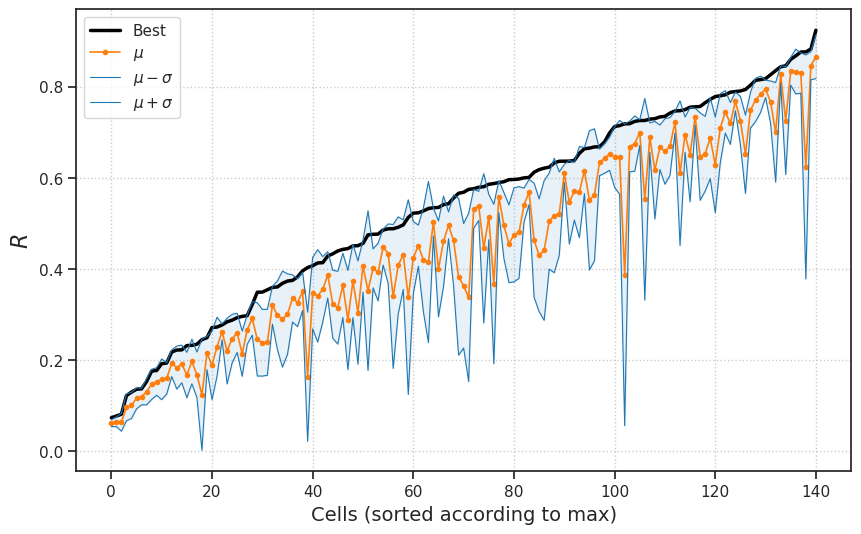

In [15]:
# HIDE CODE


fig, ax = create_figure(1, 1, (10, 6))
ax.plot(sorted_data[0], lw=2.5, color='k', label='Best')
ax.plot(sorted_data[1], lw=1.2, color='C1', marker='.', label=r'$\mu$')

lower = sorted_data[1] - sorted_data[2]
higher = sorted_data[1] + sorted_data[2]
ax.plot(lower, lw=0.8, color='C0', label=r'$\mu - \sigma$')
ax.plot(higher, lw=0.8, color='C0', label=r'$\mu + \sigma$')
ax.fill_between(
    x=range(len(df_best)),
    y1=lower,
    y2=higher,
    color='C0',
    alpha=0.1,
)
ax.set_xlabel('Cells (sorted according to max)', fontsize=14)
ax.set_ylabel(r'$R$', fontsize=16)
ax.locator_params(axis='y', nbins=10)
ax.legend()
ax.grid()
plt.show()

### Pie chart

In [16]:
labels, vals = zip(*collections.Counter(
    df_best['category']).most_common())
vals = [100 * e / sum(vals) for e in vals]

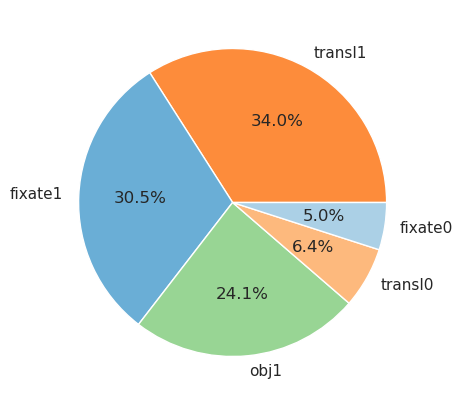

In [17]:
fig, ax = create_figure(1, 1, (6, 5))
ax.pie(
    x=vals,
    labels=labels,
    colors=[pal[e] for e in labels],
    autopct='%0.1f%%',
)
plt.show()

### Summary of results

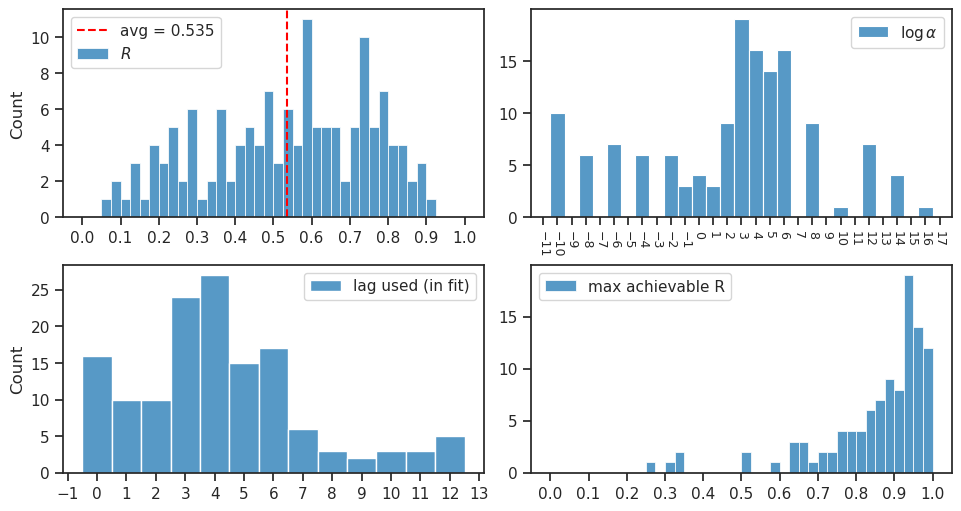

In [18]:
show_neural_results(df_best, 'perf_best');

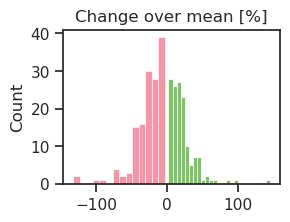

In [19]:
_pal = sns.color_palette('husl')
_pal = {'+': _pal[2], '-': _pal[0]}

fig, ax = create_figure(1, 1, (2.8, 2))
sns.histplot(df_best['%+'], color=_pal['+'], ax=ax)
sns.histplot(df_best['%-'], color=_pal['-'], ax=ax)
ax.set(xlabel='', title='Change over mean [%]')
plt.show()

In [20]:
val = np.concatenate([df_best['%+'].values, df_best['%-'].values])
label = ['+'] * len(df_best['%+']) + ['-'] * len(df_best['%-'])

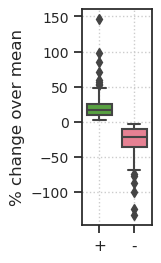

In [21]:
fig, ax = create_figure(1, 1, (0.9, 2.8))

sns.boxplot(
    data=pd.DataFrame({'val': val, 'label': label}),
    y='val',
    x='label',
    palette=_pal,
    width=0.70,
    ax=ax,
)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel='', ylabel='% change over mean')
ax.grid()
plt.show()

## Delta

<Axes: ylabel='Count'>

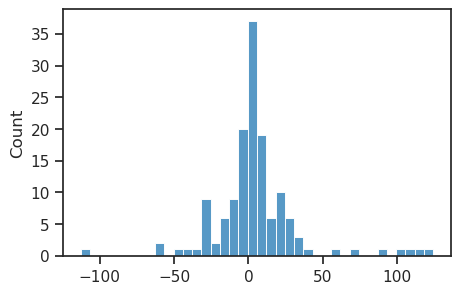

In [53]:
delta = 100 * (perf['transl1'] - perf['obj1']) / perf['obj1']
sns.histplot(delta)

In [54]:
inds = np.argsort(delta)[::-1]
perf['transl1'][inds[:5]], perf['obj1'][inds[:5]]

(array([0.58747934, 0.3492635 , 0.44470093, 0.3543917 , 0.43963464]),
 array([0.26205165, 0.16407978, 0.21458757, 0.17319512, 0.233177  ]))

In [59]:
inds = np.argsort(perf['transl1'])[::-1]
perf['transl1'][inds[:5]], perf['obj1'][inds[:5]]

(array([0.87634698, 0.876143  , 0.86199085, 0.85958291, 0.85727045]),
 array([0.68086086, 0.82501167, 0.85149622, 0.92386653, 0.82219205]))

In [60]:
df.loc[df['category'] == 'transl1'].iloc[inds[0]]

category      transl1
nf                420
root            YUWEI
expt           clu267
cell                7
perf         0.876347
max_perf     0.955361
log_alpha         2.0
best_lag            5
beta             0.15
Name: 72, dtype: object

In [61]:
df.loc[df['category'] == 'obj1'].iloc[inds[0]]

category         obj1
nf                280
root            YUWEI
expt           clu267
cell                7
perf         0.680861
max_perf     0.955361
log_alpha       -10.0
best_lag            5
beta             0.15
Name: 72, dtype: object

In [62]:
df.loc[df['category'] == 'fixate1'].iloc[inds[0]]

category      fixate1
nf                420
root            YUWEI
expt           clu267
cell                7
perf         0.822338
max_perf     0.955361
log_alpha         4.0
best_lag            4
beta             0.15
Name: 72, dtype: object

In [63]:
fit_name = fits[3]
print(fit_name)

transl1_nf-420_(2023_04_27,13:00)

In [64]:
expt = 'clu267'
kws = dict(tr=None, root='YUWEI', expt=expt)
ro = Neuron(**kws).load(fit_name, 'cuda:1')

In [65]:
data = ro.validate(7)

In [66]:
list(data)

['x', 'y', 'x_tst', 'y_tst']

In [67]:
data['y'].sum() / (len(data['y']) * 25e-3)

16.221475226148506

In [69]:
pred = ro.mod[7].predict(data['x_tst'])

In [70]:
sp_stats.pearsonr(data['y_tst'], pred)

(0.8372280722387222, 4.619487503401474e-54)

In [71]:
sk_metric.r2_score(data['y_tst'], pred)

0.6094886832665495

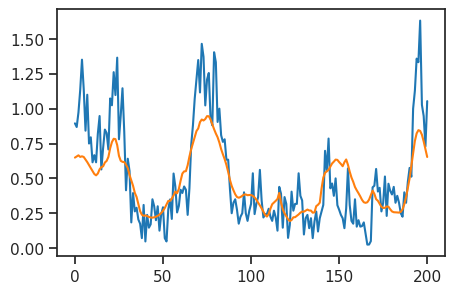

In [72]:
plt.plot(data['y_tst'])
plt.plot(pred)

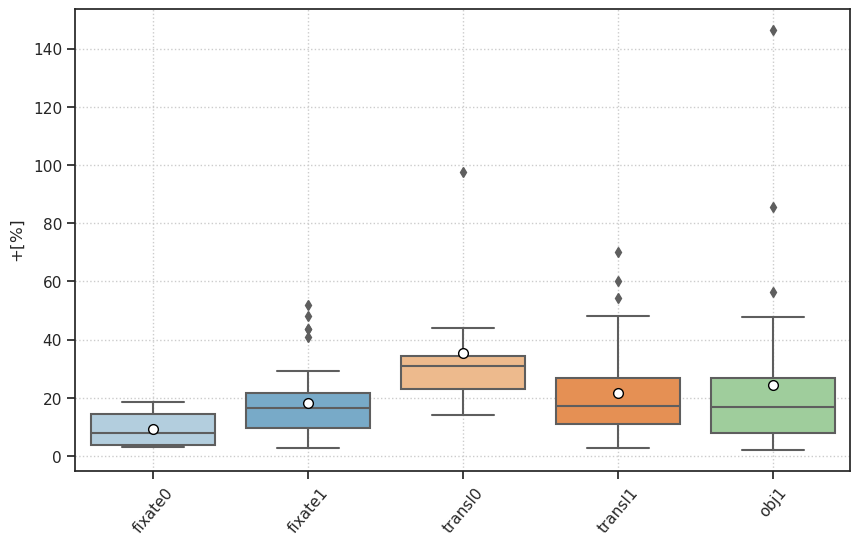

In [23]:
# HIDE CODE


props_mean = {
    'marker': 'o',
    'markerfacecolor': 'white',
    'markeredgecolor': 'k',
    'markersize': 7,
    'alpha': 1.0,
}

fig, ax = create_figure(1, 1, (10, 6))
sns.boxplot(
    data=df_best,
    y='%+',
    x='category',
    hue='category',
    order=pal,
    palette=pal,
    dodge=False,
    showmeans=True,
    meanprops=props_mean,
    ax=ax,
)
ax.set(xlabel='', ylabel=r'$+ [\%]$')
ax.tick_params(axis='x', rotation=50)
ax.get_legend().remove()
ax.grid()
plt.show()

In [24]:
categories = list(df['category'].unique())
df_test = best_fits(df, categories)
perf_best = df_test['perf_best'].mean()
perf_best

0.5351586222201329

In [25]:
reduced_perf = {}
for cat in grouped_by_cat:
    _df = best_fits(df, [e for e in categories if cat not in e])
    reduced_perf[cat] = _df['perf_best'].mean()
print(reduced_perf)

{'fixate': 0.5260211154638904, 'transl': 0.5183453091871347, 'obj': 0.525539224768023}

In [26]:
reduced_perf_objs = {}
for n_obj in grouped_by_nobj:
    _df = best_fits(df, [e for e in categories if int(e[-1]) == n_obj])
    reduced_perf_objs[n_obj] = _df['perf_best'].mean()
print(reduced_perf_objs)

{0: 0.44796809884141836, 1: 0.5289795699639248}

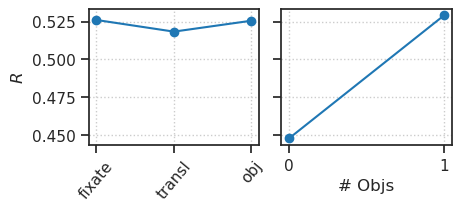

In [27]:
fig, axes = create_figure(1, 2, (4.5, 2), sharey='all', layout='constrained')

axes[0].plot(list(reduced_perf.values()), marker='o')
axes[0].set(xticks=range(len(reduced_perf)), xticklabels=list(reduced_perf), ylabel=r'$R$')
axes[0].tick_params(axis='x', rotation=50)
axes[0].grid()

axes[1].plot(list(reduced_perf_objs.values()), marker='o')
axes[1].set(xticks=range(len(reduced_perf_objs)), xticklabels=list(reduced_perf_objs), xlabel='# Objs')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid()

plt.show()